# CNN Single Layer
## Convolutional Neural Networks
โครงข่ายประสาทเทียมแบบสังวัติ

### Import Library

In [1]:
import tensorflow as tf
from tensorflow.examples.tutorials.mnist import input_data

/Users/naii/Desktop/project/cs265/env/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/Users/naii/Desktop/project/cs265/env/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/Users/naii/Desktop/project/cs265/env/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/Users/naii/Desktop/project/cs265/env

### ดาวน์โหลดชุดข้อมูล
- เก็บไว้ที่ ./mnist_data
- เข้ารหัสแบบ Onn hot encoding

![title](https://miro.medium.com/max/530/1*VAjYygFUinnygIx9eVCrQQ.png)

In [2]:
# Get the MNIST data
mnist = input_data.read_data_sets('./mnist_data', one_hot=True)

Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting ./mnist_data/train-images-idx3-ubyte.gz
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting ./mnist_data/train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Extracting ./mnist_data/t10k-images-idx3-ubyte.gz
Extracting ./mnist_data/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.


### สร้าง layer แรกรับภาพขนาด28x28

In [3]:
# The images are 28x28, so create the input layer 
# with 784 neurons (28x28=784)
x = tf.placeholder(tf.float32, [None, 784])

### สร้าง weights และ biases ที่มีทั้งหมด10 class

In [4]:
# Create a layer with weights and biases. There are 10 distinct 
# digits, so the output layer should have 10 classes
W = tf.Variable(tf.zeros([784, 10]))
b = tf.Variable(tf.zeros([10]))

### สร้างสมการเส้นตรง y = W*x + b ของ tensorflow

In [5]:
# Create the equation for 'y' using y = W*x + b 
y = tf.matmul(x, W) + b

### กำหนดการคำนวน loss และ gradient descent optimizer

In [6]:
# Define the entropy loss and the gradient descent optimizer 
y_loss = tf.placeholder(tf.float32, [None, 10])
loss = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=y,labels=y_loss))
optimizer = tf.train.GradientDescentOptimizer(0.5).minimize(loss)

Instructions for updating:

Future major versions of TensorFlow will allow gradients to flow
into the labels input on backprop by default.

See `tf.nn.softmax_cross_entropy_with_logits_v2`.



### เริ่มต้นกำหนดตัวแปรของ tensorflow

In [7]:
# Initialize all the variables
init = tf.initialize_all_variables()

Instructions for updating:
Use `tf.global_variables_initializer` instead.


### สร้าง session ของ tensorflow

In [8]:
# Create a session 
session = tf.Session() 
session.run(init)

## Train

In [9]:
# Start training 
num_iterations = 300 
batch_size = 90
for epoch in range(num_iterations):
    # Get the next batch of images
    x_batch, y_batch = mnist.train.next_batch(batch_size)
    # Train on this batch of images
    session.run(optimizer, feed_dict = {x: x_batch, y_loss: y_batch})
    # Compute the accuracy using test data
    predicted = tf.equal(tf.argmax(y, 1), tf.argmax(y_loss, 1)) 
    accuracy = tf.reduce_mean(tf.cast(predicted, tf.float32))
    print("Epoch {}/{}".format(epoch,num_iterations))
    print('Accuracy =', session.run(accuracy, feed_dict = {x: mnist.test.images, y_loss: mnist.test.labels}))
    print()

Epoch 0/300
Accuracy = 0.2432

Epoch 1/300
Accuracy = 0.4373

Epoch 2/300
Accuracy = 0.5574

Epoch 3/300
Accuracy = 0.6461

Epoch 4/300
Accuracy = 0.7135

Epoch 5/300
Accuracy = 0.6661

Epoch 6/300
Accuracy = 0.6022

Epoch 7/300
Accuracy = 0.7433

Epoch 8/300
Accuracy = 0.777

Epoch 9/300
Accuracy = 0.8031

Epoch 10/300
Accuracy = 0.8168

Epoch 11/300
Accuracy = 0.8059

Epoch 12/300
Accuracy = 0.7996

Epoch 13/300
Accuracy = 0.7706

Epoch 14/300
Accuracy = 0.8347

Epoch 15/300
Accuracy = 0.8134

Epoch 16/300
Accuracy = 0.8353

Epoch 17/300
Accuracy = 0.8227

Epoch 18/300
Accuracy = 0.7801

Epoch 19/300
Accuracy = 0.8468

Epoch 20/300
Accuracy = 0.8568

Epoch 21/300
Accuracy = 0.8466

Epoch 22/300
Accuracy = 0.8474

Epoch 23/300
Accuracy = 0.8409

Epoch 24/300
Accuracy = 0.8553

Epoch 25/300
Accuracy = 0.8574

Epoch 26/300
Accuracy = 0.8132

Epoch 27/300
Accuracy = 0.8582

Epoch 28/300
Accuracy = 0.8527

Epoch 29/300
Accuracy = 0.8584

Epoch 30/300
Accuracy = 0.8644

Epoch 31/300
Accura

Accuracy = 0.9096

Epoch 256/300
Accuracy = 0.8971

Epoch 257/300
Accuracy = 0.9067

Epoch 258/300
Accuracy = 0.9087

Epoch 259/300
Accuracy = 0.9092

Epoch 260/300
Accuracy = 0.9088

Epoch 261/300
Accuracy = 0.909

Epoch 262/300
Accuracy = 0.908

Epoch 263/300
Accuracy = 0.9099

Epoch 264/300
Accuracy = 0.9113

Epoch 265/300
Accuracy = 0.906

Epoch 266/300
Accuracy = 0.8976

Epoch 267/300
Accuracy = 0.9078

Epoch 268/300
Accuracy = 0.909

Epoch 269/300
Accuracy = 0.9106

Epoch 270/300
Accuracy = 0.9113

Epoch 271/300
Accuracy = 0.909

Epoch 272/300
Accuracy = 0.9096

Epoch 273/300
Accuracy = 0.9094

Epoch 274/300
Accuracy = 0.9073

Epoch 275/300
Accuracy = 0.9086

Epoch 276/300
Accuracy = 0.9114

Epoch 277/300
Accuracy = 0.9122

Epoch 278/300
Accuracy = 0.9039

Epoch 279/300
Accuracy = 0.9072

Epoch 280/300
Accuracy = 0.9119

Epoch 281/300
Accuracy = 0.9094

Epoch 282/300
Accuracy = 0.9074

Epoch 283/300
Accuracy = 0.9087

Epoch 284/300
Accuracy = 0.9079

Epoch 285/300
Accuracy = 0.90

## คำนวนประสิทธิภาพโดยใช้ชุดข้อมูลทดสอบ

In [10]:
# Compute the accuracy using test data
predicted = tf.equal(tf.argmax(y, 1), tf.argmax(y_loss, 1))
accuracy = tf.reduce_mean(tf.cast(predicted, tf.float32))
print('\nAccuracy =', session.run(accuracy, feed_dict = {
        x: mnist.test.images, 
        y_loss: mnist.test.labels}))


Accuracy = 0.9097


# ทดลอง ทำนายภาพ

In [15]:
import matplotlib.pyplot as plt

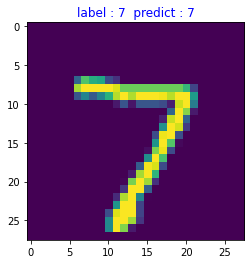

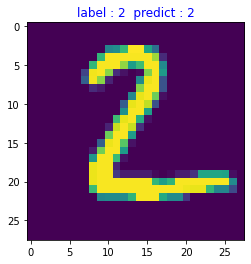

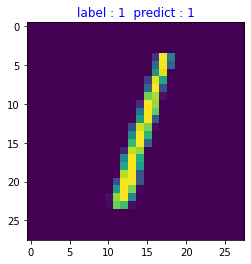

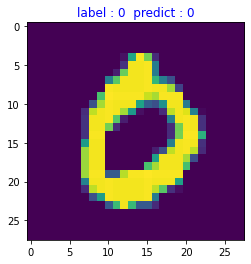

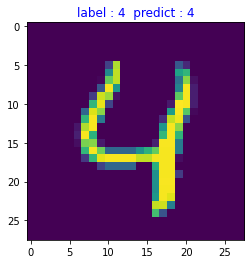

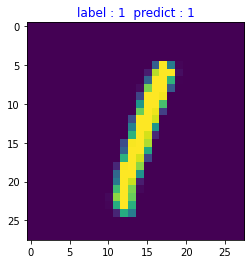

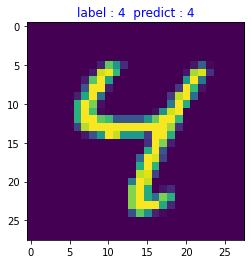

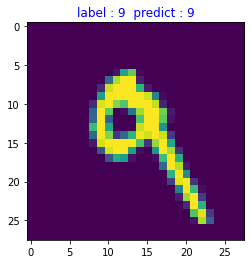

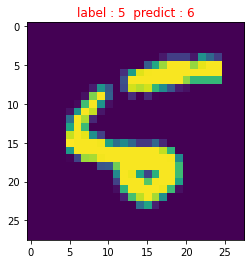

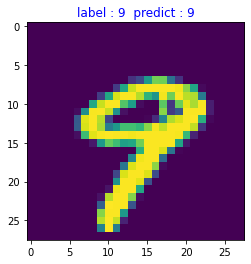

In [78]:
for i in range(10):
    data = mnist.test.images[i]
    l=list(mnist.test.labels[i]).index(1.)
    img=data.reshape(28,28)
    prediction=tf.argmax(y,1)
    r = prediction.eval(feed_dict={x: [data]}, session=session)
    text = "label : {}  predict : {}".format(l,r[0])
    plt.imshow(img)
    if(l!=r[0]):
        plt.title(text,color='r')
    else:
        plt.title(text,color='b')
    plt.show()